In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

# input data

In [165]:
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/_inputParameters.csv',names=['key','value'])
inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data/_inputParameters.csv',names=['key','value'])
#inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data_cutoff7000_bleachCorrected/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)


5689.0


In [166]:
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0000_488nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70
--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70


/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
(201, 704, 600)


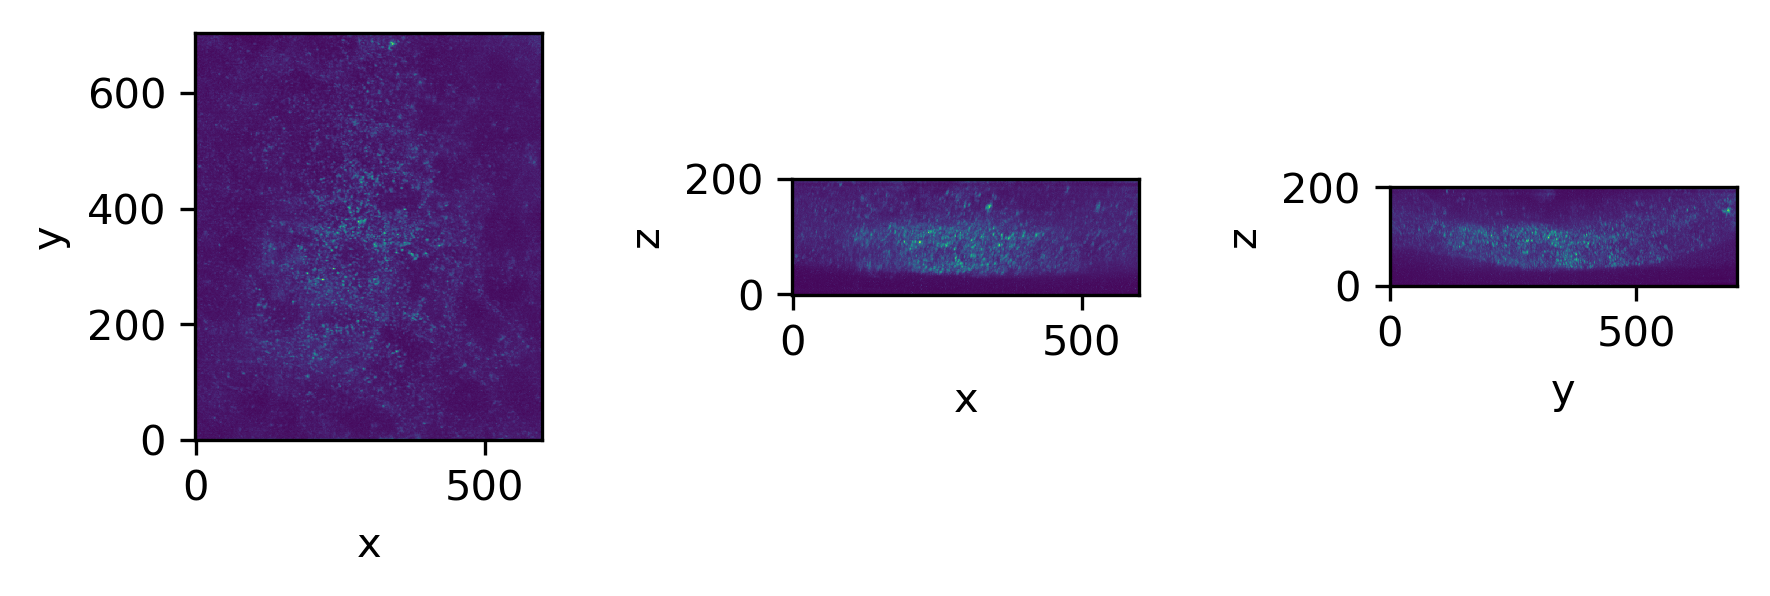

In [167]:
# read the image from where the detections come from
frameId = 0

path = inputDataFolder+'/'+master_filesOfInterest[frameId]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(path)
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)

tiffproc.maxIntensityProjection(latticeMovieFrame)

In [168]:
# read the raw csv data for further processing

path = outputDataFolder+'/'+trackingCsvFilenameProcessed
print(path)
print(path)

data = pd.read_csv(path,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","lifetime","catIdx","m_x",'m_y',"m_z","m_A","m_c","m_pval_Ar","s_x",'s_y',"s_z","s_A","s_c","s_pval_Ar"]
trackIds = data.drop_duplicates(subset='trackId')['trackId'].values

data[0:5]





/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/trackedFeaturesProcessed.csv
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/trackedFeaturesProcessed.csv


,trackId,tracklength,time[s],frameId,lifetime,catIdx,m_x,m_y,m_z,m_A,m_c,m_pval_Ar,s_x,s_y,s_z,s_A,s_c,s_pval_Ar
0,1,70,0,1,398.23,4,2.470622e+02,3.589416e+02,1.549039e+02,2.852619e+04,8.000496e+03,0,2.467932e+02,3.583062e+02,1.549039e+02,2.463543e+04,2.298148e+04,4.004483e-248
1,1,70,5.689000e+00,2,398.23,4,2.456148e+02,3.597828e+02,1.550418e+02,2.568300e+04,7.529965e+03,0,2.478346e+02,3.586792e+02,1.550418e+02,3.039361e+04,2.187127e+04,9.081350e-301
2,1,70,1.137800e+01,3,398.23,4,2.461329e+02,3.596650e+02,1.552289e+02,2.243185e+04,7.161439e+03,0,2.481213e+02,3.588762e+02,1.552289e+02,2.262764e+04,2.301794e+04,2.082318e-241
3,1,70,1.706700e+01,4,398.23,4,2.464530e+02,3.601393e+02,1.541899e+02,2.305632e+04,7.131548e+03,0,2.480255e+02,3.576223e+02,1.541899e+02,1.986063e+04,2.412181e+04,6.424817e-223
4,1,70,2.275600e+01,5,398.23,4,2.450720e+02,3.601834e+02,1.542996e+02,2.097679e+04,6.756136e+03,0,2.437382e+02,3.597427e+02,1.542996e+02,1.916658e+04,2.210576e+04,2.288247e-261


# select subset

In [169]:
# select a subset of the tracks, e.g. for displaying only long tracks

allTrackIdsLrgrThanFour = (data[data['tracklength'] >= 4]).drop_duplicates(subset='trackId')['trackId'].values
allTrackIds = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ia_Tracks_long = np.unique(data[((data['catIdx'] == 1) & (data['tracklength'] > 4))]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])


print('len(allTrackIdsLrgrThanFour)/len(allTrackIds)')
print(str(len(allTrackIdsLrgrThanFour))+'/'+str(len(allTrackIds)))
print()
print(allTrackIdsLrgrThanFour)
print('/')
print(allTrackIds)
print()

len(allTrackIdsLrgrThanFour)/len(allTrackIds)
1471/3274

[   1    2    3 ..., 1469 1470 1471]
/
[   1    2    3 ..., 3272 3273 3274]



In [170]:
import re
def parseCutString(string):
    result = []
    #pattern match the indexing string
    chunks = re.findall("\\[[0-9]+,[0-9]+\\]",string)
    for chunk in chunks:
        indexes = re.findall("[0-9]+",chunk)
        if(len(indexes)==2):
            result.append([int(indexes[0]),int(indexes[1])])
        else:
            print("error: index \""+indexes+"\" cannot be parsed")

    return result

In [171]:
# align them all to the max

In [172]:

maxIdxs = []
for trackId in cat_Ia_Tracks_long:
    track = track = data[data['trackId'] == trackId]
    maxIdx = np.argmax(track['s_A'].values)
    maxIdxs.append(maxIdx)
maxIdxs = np.array(maxIdxs)
print(maxIdxs)

[ 0 28 19 20  3  9  9 15  7 14 14 17  1 20 12 12  2 10 19 11 12 13  1  3 15
  0 11 12  2  6  8  4  2  0  0 14 12 12 12 15  6 15  9 13  0 14  7  0 10  4
  3  2 12 11  5  6  3  0 14 12 11  2  4 13  1  8  2  9  5  1  3  2  3  3  6
  3 10  7 12  8  3  6 11 11 11  5  1  0  7  2  1  8  4  2  6  2  1 11  7 11
  1  4  5  3  6  0  4  0  3  8  4  1  6  6  0  3  4  0  8  6  5  6  0  6  0
  1  3  6  2  1  2  8  9  7  0  2  1  9  6  4  2  8  8  4  2  9  1  9  7  7
  3  6  2  1  1  4  5  4  6  3  9  0  7  2  8  2  0  7  5  2  5  2  3  2  2
  7  2  1  0  1  8  3  7  4  3  2  1  5  2  7  5  7  2  7  0  0  8  0  5  3
  8  1  6  4  7  3  7  0  7  7  0  0  8  5  7  4  5  7  5  5  1  0  1  2  3
  0  6  4  0  0  6  2  3  0  2  6  5  0  6  2  5  7  2  0  4  2  1  6  4  3
  7  0  0  6  5  6  5  4  0  1  0  4  5  3  0  5  1  1  0  1  1  1  0  0  6
  4  1  4  3  0  5  2  3  1  0  6  2  6  5  2  4  5  1  2  4  5  0  5  4  0
  2  6  2  1  1  5  5  2  3  3  0  4  5  5  5  3  6  5  4  1  3  3  3  1  3
  2  6  2  3

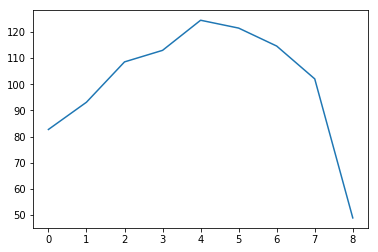

In [173]:

lifetimeCohorts = [[0, 6], [6,12],[12,18],[18,50]] #seconds

binSize = 700/9
yBins = [   0. , 77.77777778 , 155.55555556 , 233.33333333 , 311.11111111 ,
  388.88888889 , 466.66666667 , 544.44444444 , 622.22222222 , 700.        ]
zTresholds_apibaso = [ 117.30371435,  106.8935544 ,   91.49227078,   87.08214307,
         75.58176287,   78.57998916,   85.43989849,   97.97795952,
        151.08614626]  #px
#it is actually curved the opposite way!
zTresholds_apibaso = abs(np.array(zTresholds_apibaso)-200)
plt.plot(zTresholds_apibaso)
#x: 92.8856 z:91.44027, zThreshold: 107.59988712 baso: True
#x: 304.9034 z:145.3133, zThreshold: 87.9015554 baso: False

In [189]:
# data preprocessing

# take only those tracks that belong to the cohort:

#initialize the trackId array sorted by lifetime cohort
trackIdsAssignedToCohorts_api = []
trackIdsAssignedToCohorts_baso = []
for i in range(0,len(lifetimeCohorts)):
    trackIdsAssignedToCohorts_api.append(np.array([]))
    trackIdsAssignedToCohorts_baso.append(np.array([]))


trackIdsUsed = cat_Ia_Tracks_long
baso = False

basoFirstYZ=[]
basoLifetimes=[]
baso_mAmplitude=[] 
baso_sAmplitude=[]  
apiFirstYZ=[]
apiLifetimes=[]
api_mAmplitude=[]
api_sAmplitude=[]

for trackId in trackIdsUsed:
    track = data[data['trackId'] == trackId]
    tracklength = track['tracklength'].values[0]
    m_intensity = track['m_A'].values.astype(float)
    s_intensity = track['s_A'].values.astype(float)
    maxIdx = np.argmax(s_intensity)
    # only include those tracks that do not have the dynamin peak in the first three frames
    
    m_firstY = track['m_y'].values.astype(float)[0]
    m_firstZ = track['m_z'].values.astype(float)[0]
    m_firstY_idxInBins = int(np.floor(m_firstY/binSize))
    #print(m_firstY_idxInBins)
    zThreshold_apibaso =  zTresholds_apibaso[m_firstY_idxInBins]
    if(m_firstZ < zThreshold_apibaso):
        baso = False
        apiFirstYZ.append([m_firstY,m_firstZ])
        apiLifetimes.append(tracklength)
        api_mAmplitude.append(m_intensity)
        api_sAmplitude.append(s_intensity)
    else:
        baso = True
        basoFirstYZ.append([m_firstY,m_firstZ])
        basoLifetimes.append(tracklength)
        baso_mAmplitude.append(m_intensity)
        baso_sAmplitude.append(s_intensity)

                
        
    #print("y: {} z:{}, zThreshold: {} baso: {}".format(m_firstY,m_firstZ,zThreshold_apibaso,baso) )
    if(maxIdx >3):
#    if(True):
    
        for i in range(0,len(lifetimeCohorts)):
        
            if((tracklength >lifetimeCohorts[i][0]) & (tracklength <lifetimeCohorts[i][1])):
                if(baso):
                    trackIdsAssignedToCohorts_baso[i] = np.append(trackIdsAssignedToCohorts_baso[i],trackId)
                else:
                    trackIdsAssignedToCohorts_api[i] = np.append(trackIdsAssignedToCohorts_api[i],trackId)
trackIdsAssignedToCohorts_api = np.array(trackIdsAssignedToCohorts_api)
trackIdsAssignedToCohorts_baso = np.array(trackIdsAssignedToCohorts_baso)
print(trackIdsAssignedToCohorts_api)

api_cohorts_n = []
for cohortIdArray in trackIdsAssignedToCohorts_api:
    print(len(cohortIdArray))
    api_cohorts_n.append(len(cohortIdArray))
    
print(trackIdsAssignedToCohorts_baso)
baso_cohorts_n = []
for cohortIdArray in trackIdsAssignedToCohorts_baso:
    print(len(cohortIdArray))
    baso_cohorts_n.append(len(cohortIdArray))

[ array([  941.,   943.,   953.,   954.,   971.,   972.,   974.,   976.,
         981.,   996.,  1002.,  1008.,  1034.,  1039.,  1069.,  1071.])
 array([ 298.,  300.,  304.,  307.,  310.,  351.,  355.,  358.,  359.,
        360.,  362.,  365.,  366.,  369.,  370.,  371.,  373.,  374.,
        416.,  422.,  424.,  427.,  429.,  430.,  434.,  436.,  438.,
        440.,  442.,  449.,  450.,  452.,  501.,  505.,  507.,  509.,
        511.,  513.,  516.,  517.,  531.,  533.,  538.,  540.,  606.,
        607.,  612.,  613.,  619.,  620.,  625.,  629.,  631.,  636.,
        638.,  658.,  670.,  671.,  677.,  678.,  681.])
 array([ 123.,  124.,  126.,  129.,  140.,  146.,  147.,  165.,  166.,
        167.,  170.,  174.,  194.,  196.,  198.,  200.,  201.,  203.,
        204.,  206.,  225.,  226.,  229.])
 array([ 39.,  40.,  50.,  51.,  52.,  61.,  68.,  69.,  75.,  84.,  96.])]
16
61
23
11
[ array([  937.,   946.,   947.,   959.,   967.,   973.,   986.,   993.,
         998.,  1003.,  1009.,  

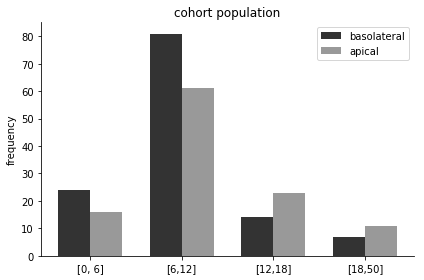

In [200]:
# data to plot
n_groups = 4
A = (baso_cohorts_n[0], baso_cohorts_n[1],baso_cohorts_n[2],baso_cohorts_n[3])
B = (api_cohorts_n[0], api_cohorts_n[1],api_cohorts_n[2],api_cohorts_n[3])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, A, bar_width,
                 alpha=opacity,
                 color='k',
                 label='basolateral')
 
rects2 = plt.bar(index + bar_width, B, bar_width,
                 alpha=opacity,
                 color='grey',
                 label='apical')
 
#plt.xlabel('Person')
plt.ylabel('frequency')
plt.title('cohort population')
plt.xticks(index + bar_width/2, ('[0, 6]', '[6,12]','[12,18]', '[18,50]'))

plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
 
plt.tight_layout()
plt.show()


In [175]:
print(len(trackIdsUsed))

621


Text(0,0.5,'z[px]')

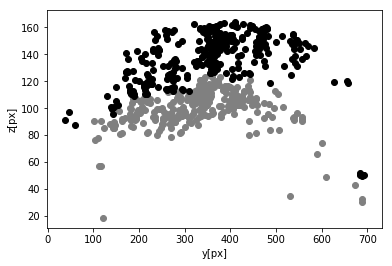

In [211]:

plt.scatter(np.array(apiFirstYZ)[:,0],np.array(apiFirstYZ)[:,1],c='grey')
plt.scatter(np.array(basoFirstYZ)[:,0],np.array(basoFirstYZ)[:,1],c='k')
plt.xlabel('y[px]')
plt.ylabel('z[px]')

Text(0,0.5,'frequency')

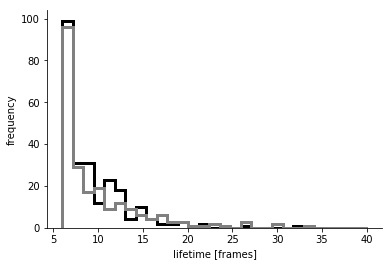

In [210]:
#plt.plot(basoLifetimes)
#plt.plot(apiLifetimes)
plt.hist(basoLifetimes,histtype='step',linewidth=3,color='k',bins=np.linspace(6, 40, 30));
plt.hist(apiLifetimes,histtype='step',linewidth=3,color='grey',bins=np.linspace(6, 40, 30));
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('lifetime [frames]')
plt.ylabel('frequency')

In [178]:
def flattenList(array):
    return[item for sublist in array for item in sublist]


Text(0,0.5,'frequency')

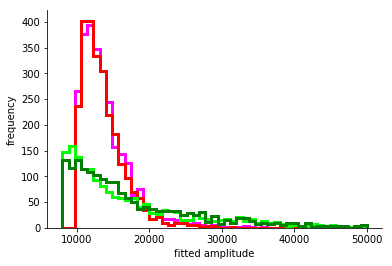

In [205]:
plt.hist(flattenList(baso_mAmplitude),histtype='step',linewidth=3,color='magenta',bins=np.linspace(8000, 50000, 50));
plt.hist(flattenList(api_mAmplitude),histtype='step',linewidth=3,color='red',bins=np.linspace(8000, 50000, 50));#,bins=np.linspace(6, 60, 50));
#plt.hist(api_mAmplitude,histtype='step')#,bins=np.linspace(6, 60, 50));
plt.hist(flattenList(baso_sAmplitude),histtype='step',linewidth=3,color='lime',bins=np.linspace(8000, 50000, 50));
plt.hist(flattenList(api_sAmplitude),histtype='step',linewidth=3,color='green',bins=np.linspace(8000, 50000, 50));#
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('fitted amplitude')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

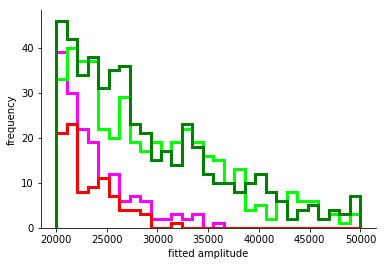

In [209]:
plt.hist(flattenList(baso_mAmplitude),histtype='step',linewidth=3,color='magenta',bins=np.linspace(20000, 50000, 30));
plt.hist(flattenList(api_mAmplitude),histtype='step',linewidth=3,color='red',bins=np.linspace(20000, 50000, 30));#,bins=np.linspace(6, 60, 50));
#plt.hist(api_mAmplitude,histtype='step')#,bins=np.linspace(6, 60, 50));
plt.hist(flattenList(baso_sAmplitude),histtype='step',linewidth=3,color='lime',bins=np.linspace(20000, 50000, 30));
plt.hist(flattenList(api_sAmplitude),histtype='step',linewidth=3,color='green',bins=np.linspace(20000, 50000, 30));#
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('fitted amplitude')
plt.ylabel('frequency')

In [181]:


def createBufferForLifetimeCohort(listOfTrackIdsAssignedToCohort,    backgroundIntensity ):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = data[data['trackId'] == trackId]
        tracklength = track['tracklength'].values[0]
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        maxIdx = np.argmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])
            if(not np.isnan(s_intensity[i])):
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])
           
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)



In [182]:


def createBufferForLifetimeCohort_normalized(listOfTrackIdsAssignedToCohort,    backgroundIntensity ):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100

    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity,dtype=float)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = data[data['trackId'] == trackId]
        tracklength = track['tracklength'].values[0]
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        maxIdx = np.argmax(s_intensity)
        m_maxIntensity = np.nanmax(m_intensity)
        s_maxIntensity = np.nanmax(s_intensity)
        
    
        for i in range(0,len(track)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_intensity[i])/m_maxIntensity
            if(not np.isnan(s_intensity[i])):
                valueToPut = (s_intensity[i])/s_maxIntensity
                #print(valueToPut)
                s_buffer[counter][bufferZero-maxIdx+i]=(s_intensity[i])/s_maxIntensity
                #print(s_buffer[counter])
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)


# apical

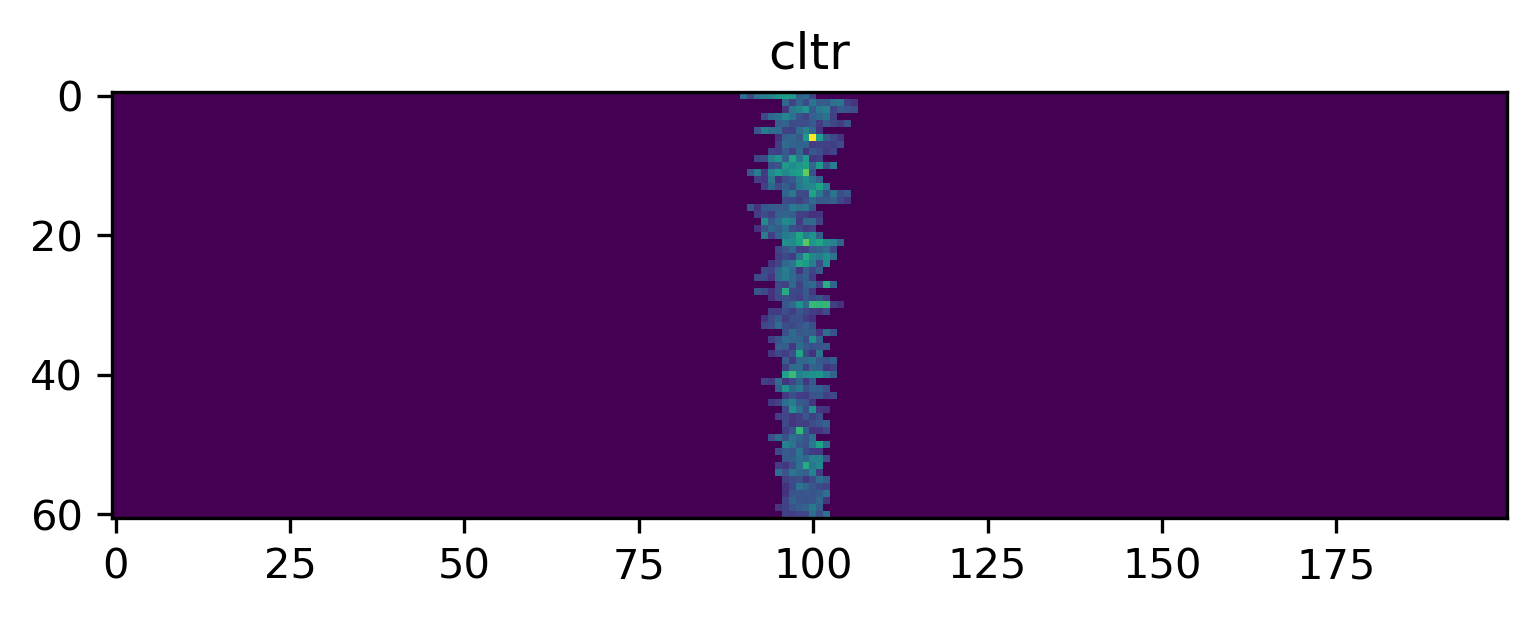

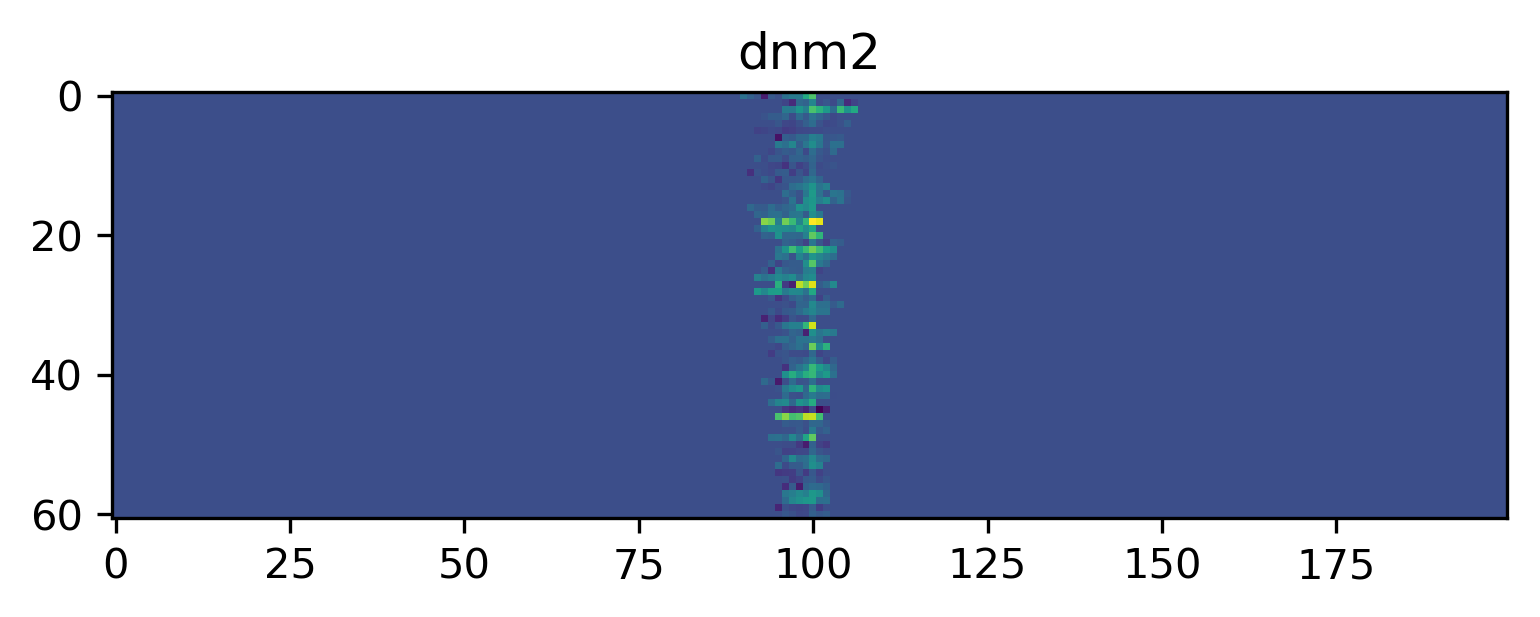

In [183]:
#calculate all the buffers for all cohorts
backgroundIntensity = 7000

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts_api[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0.5,1,'Apical')

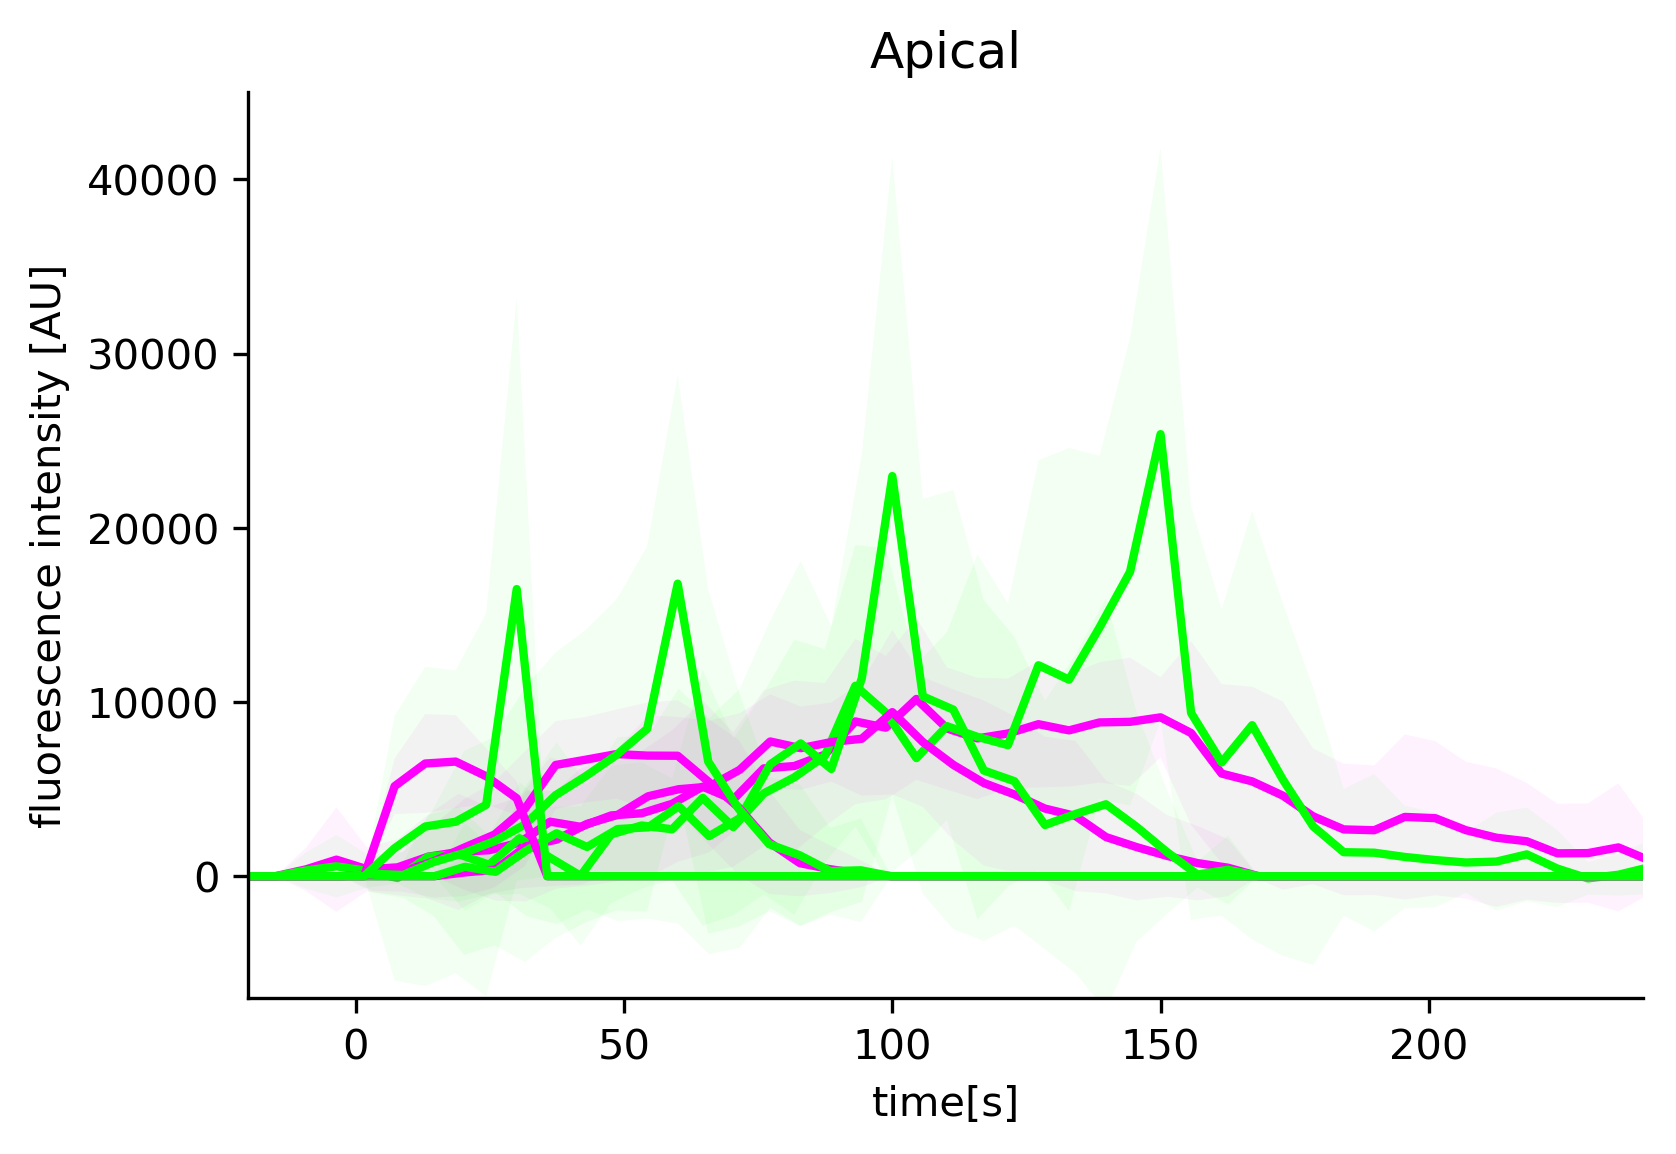

In [184]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')
plt.title('Apical')

7000


Text(0,0.5,'fluorescence intensity [AU]')

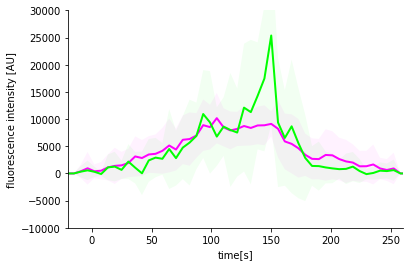

In [185]:
cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]
print(backgroundIntensity)
m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)
plt.xlim(-20,260)
plt.ylim(-10000,30000)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')

# basolateral

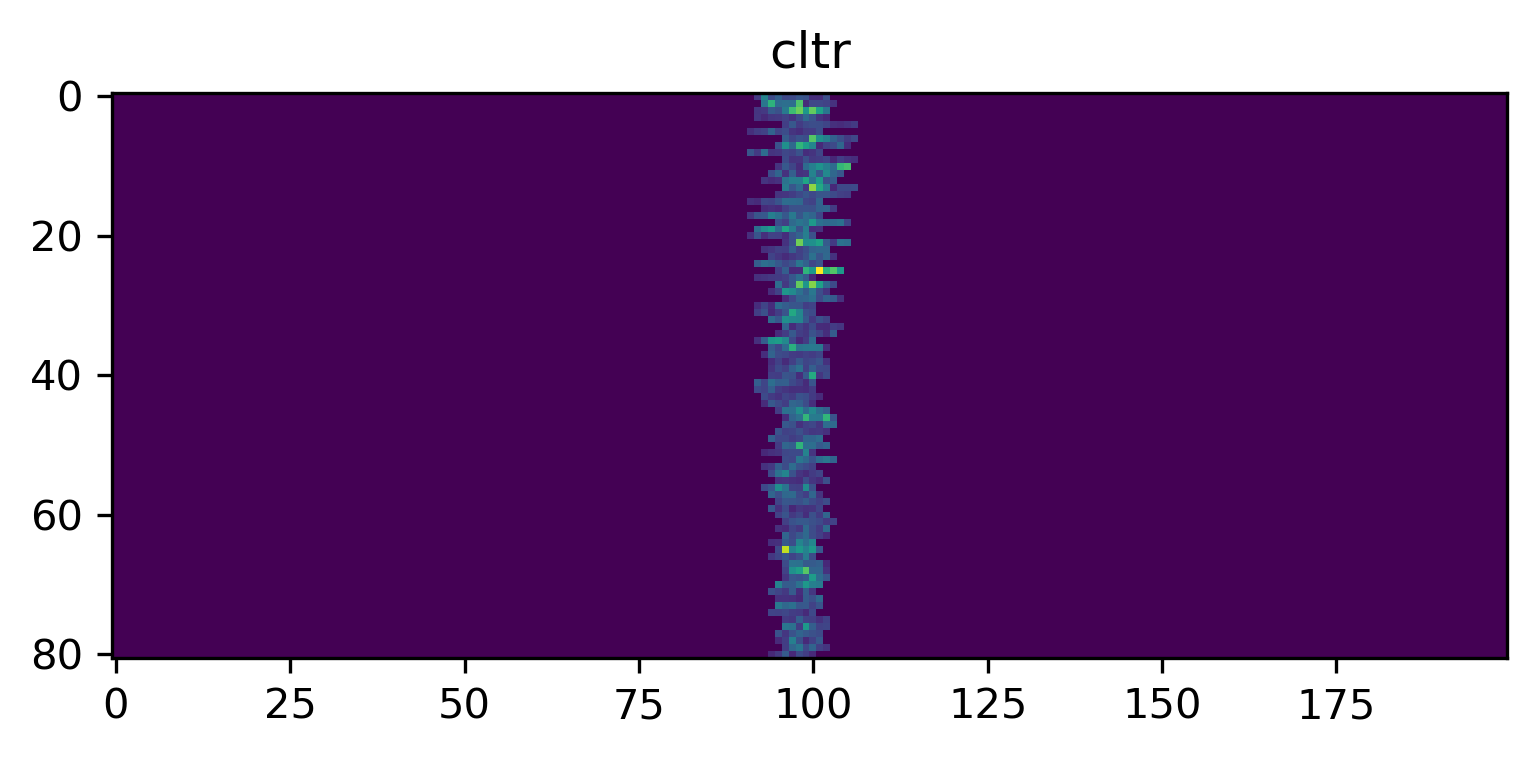

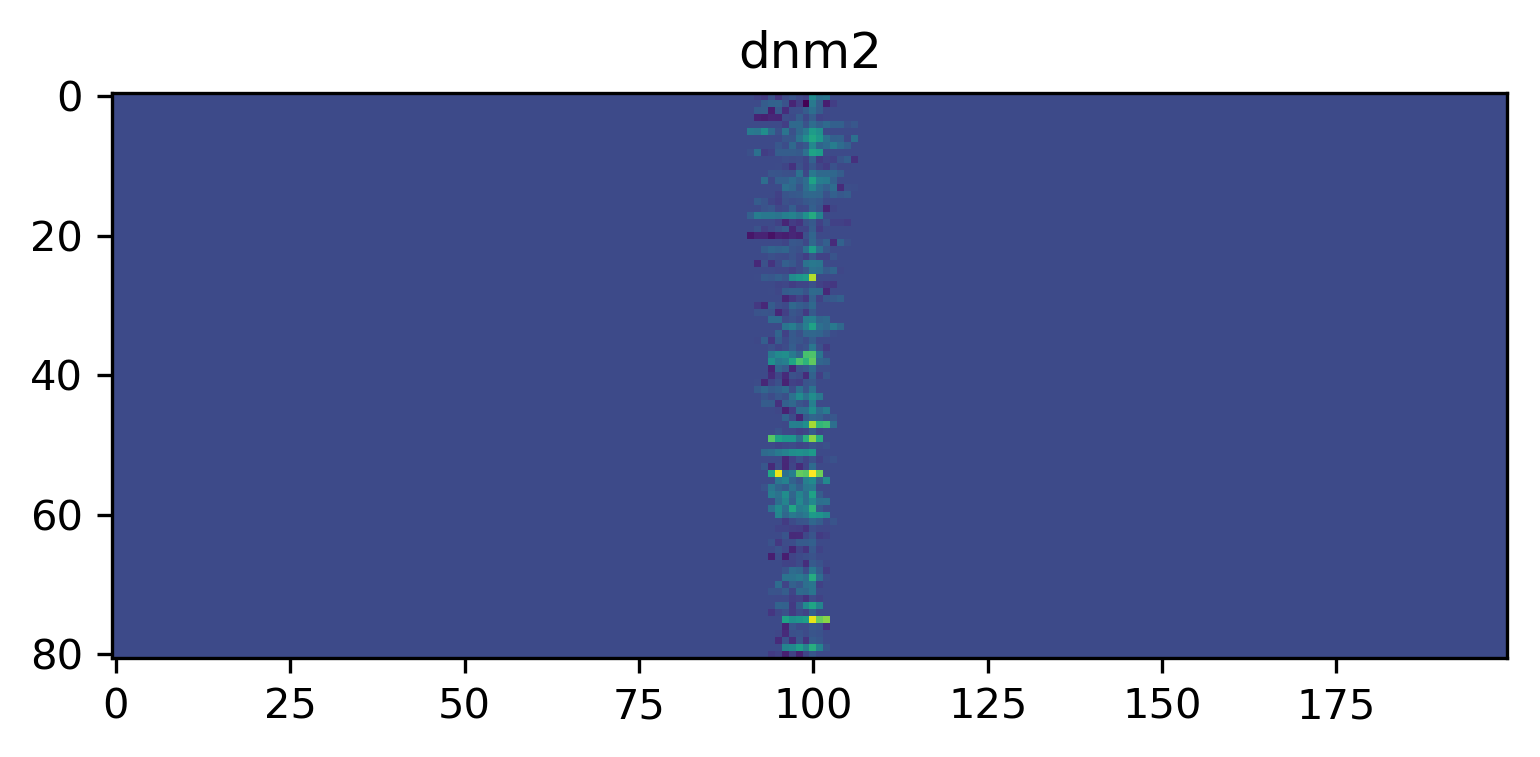

In [186]:
#calculate all the buffers for all cohorts
backgroundIntensity = 7000

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts_baso[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0.5,1,'Basolateral')

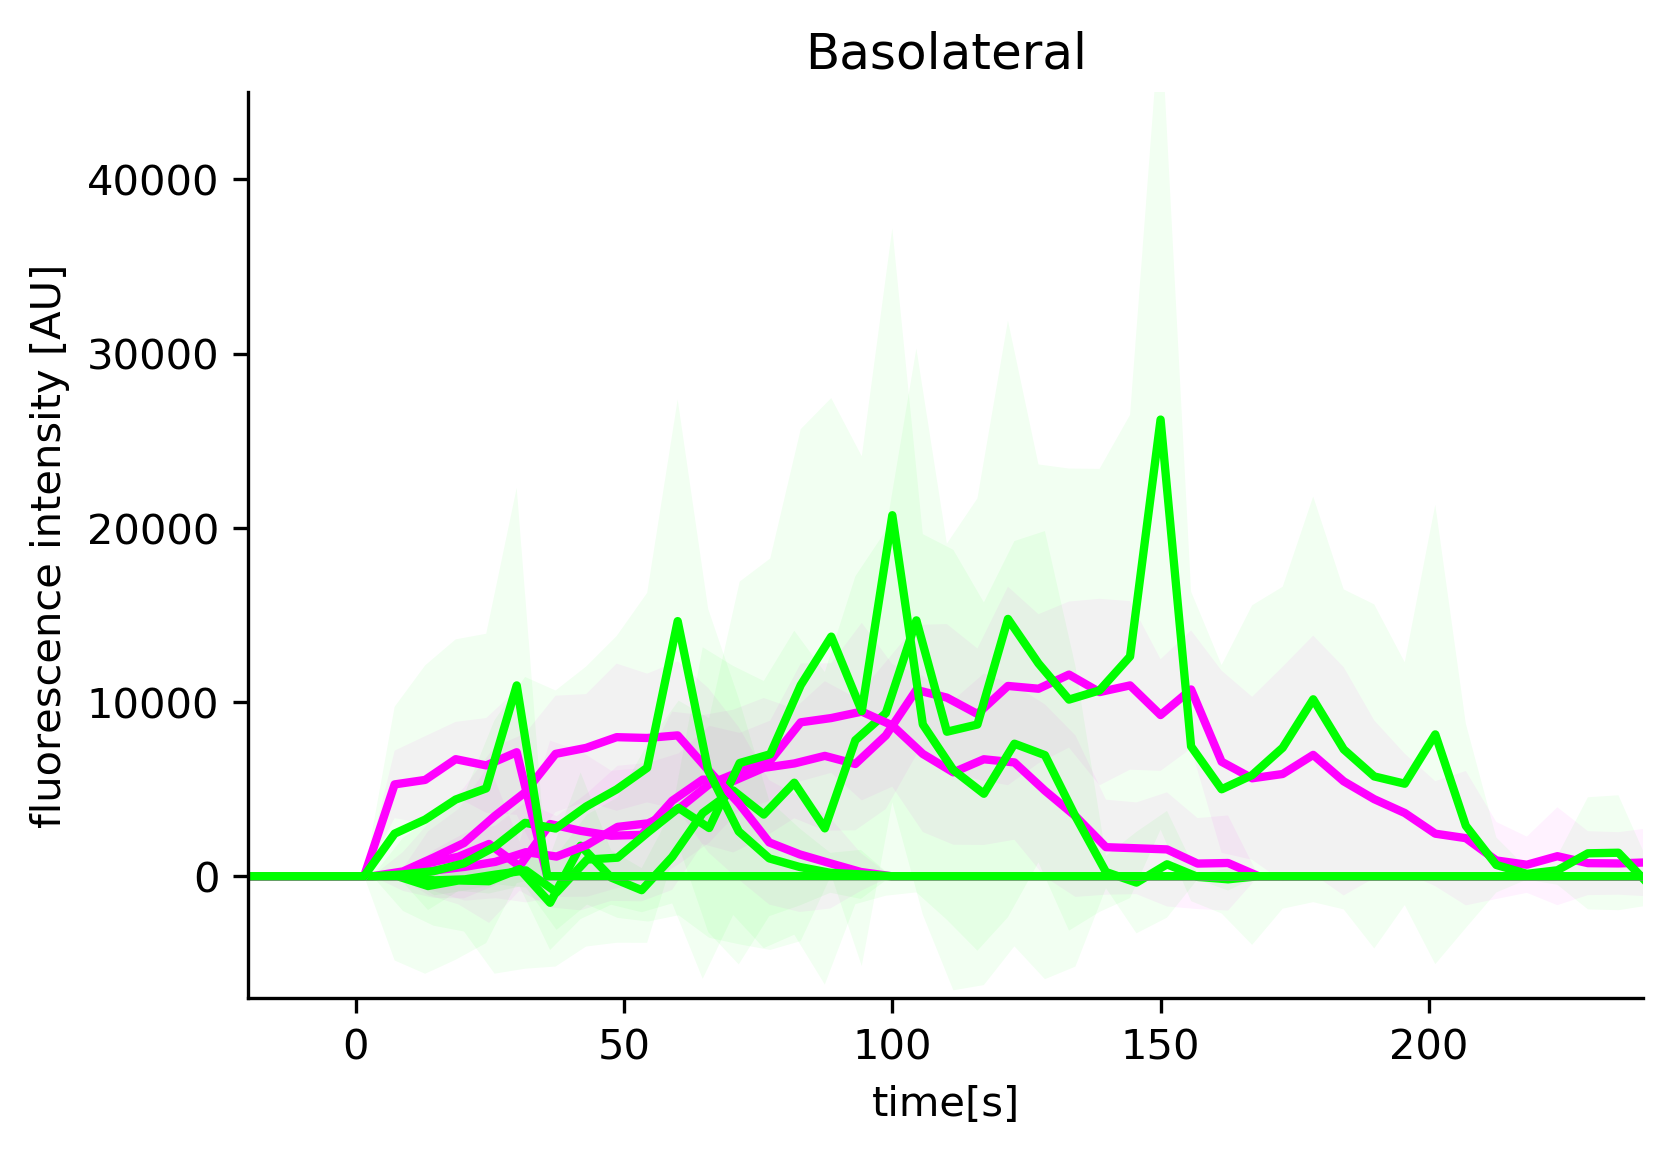

In [187]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')
plt.title('Basolateral')

In [58]:
# taking only the real values

In [59]:
def avgAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax1 = len(twoDArray[0])
    len_ax0 = len(twoDArray)
    print("len_ax0 "+str(len_ax0))
    print("len_ax1 "+str(len_ax1))
    result = []
    for i in range(0,len_ax1):
#        print(i)
        column = twoDArray[:,i]
#        print(column)
        excludedColumn = column[column != ignoredValue]
#        print(excludedColumn)
        if(len(excludedColumn) == 0):
            result.append(replacementValue)
        else:
            result.append(np.nanmean(excludedColumn))
    result = np.array(result)
    return result

In [60]:
def stdAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax1 = len(twoDArray[0])
    len_ax0 = len(twoDArray)
    print("len_ax0 "+str(len_ax0))
    print("len_ax1 "+str(len_ax1))
    result = []
    for i in range(0,len_ax1):
#        print(i)
        column = twoDArray[:,i]
#        print(column)
        excludedColumn = column[column != ignoredValue]
#        print(excludedColumn)
        if(len(excludedColumn) == 0):
            result.append(replacementValue)
        else:
            result.append(np.nanstd(excludedColumn))
    result = np.array(result)
    return result

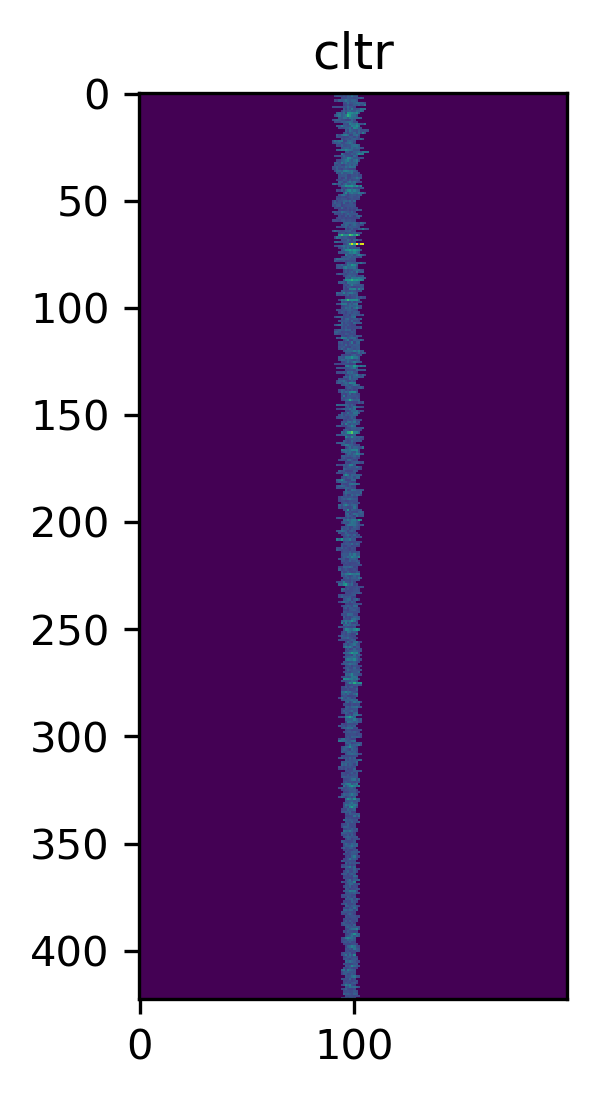

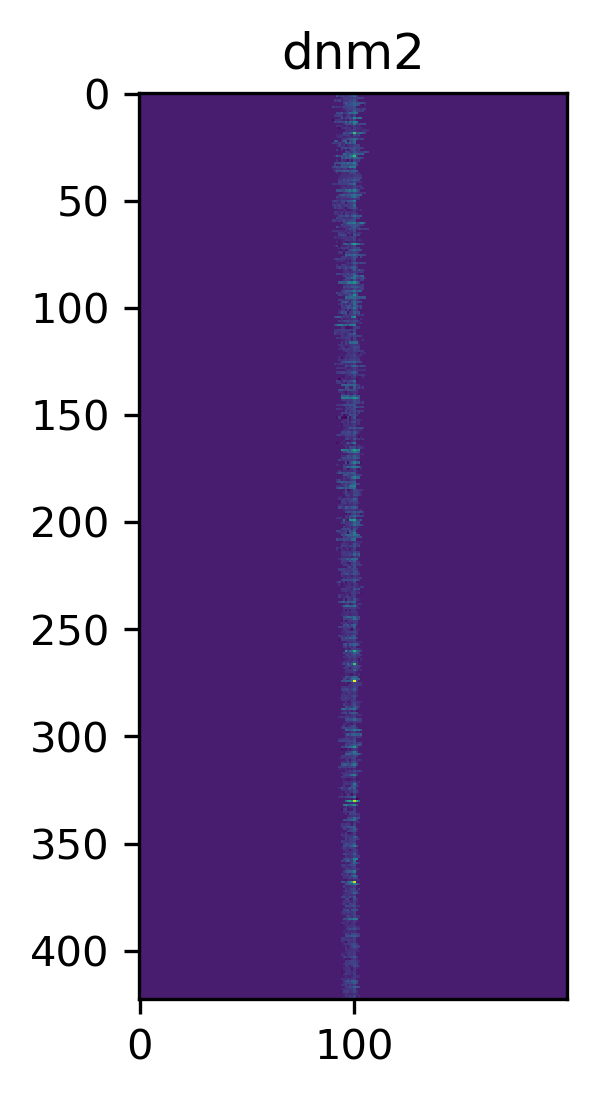

In [66]:
#calculate all the buffers for all cohorts
backgroundIntensity = -1

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort(trackIdsAssignedToCohorts[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

len_ax0 82
len_ax1 200
len_ax0 82
len_ax1 200
len_ax0 82
len_ax1 200
len_ax0 82
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 144
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 423
len_ax1 200
len_ax0 101
len_ax1 200
len_ax0 101
len_ax1 200
len_ax0 101
len_ax1 200
len_ax0 101
len_ax1 200


Text(0,0.5,'distance from start [px]')

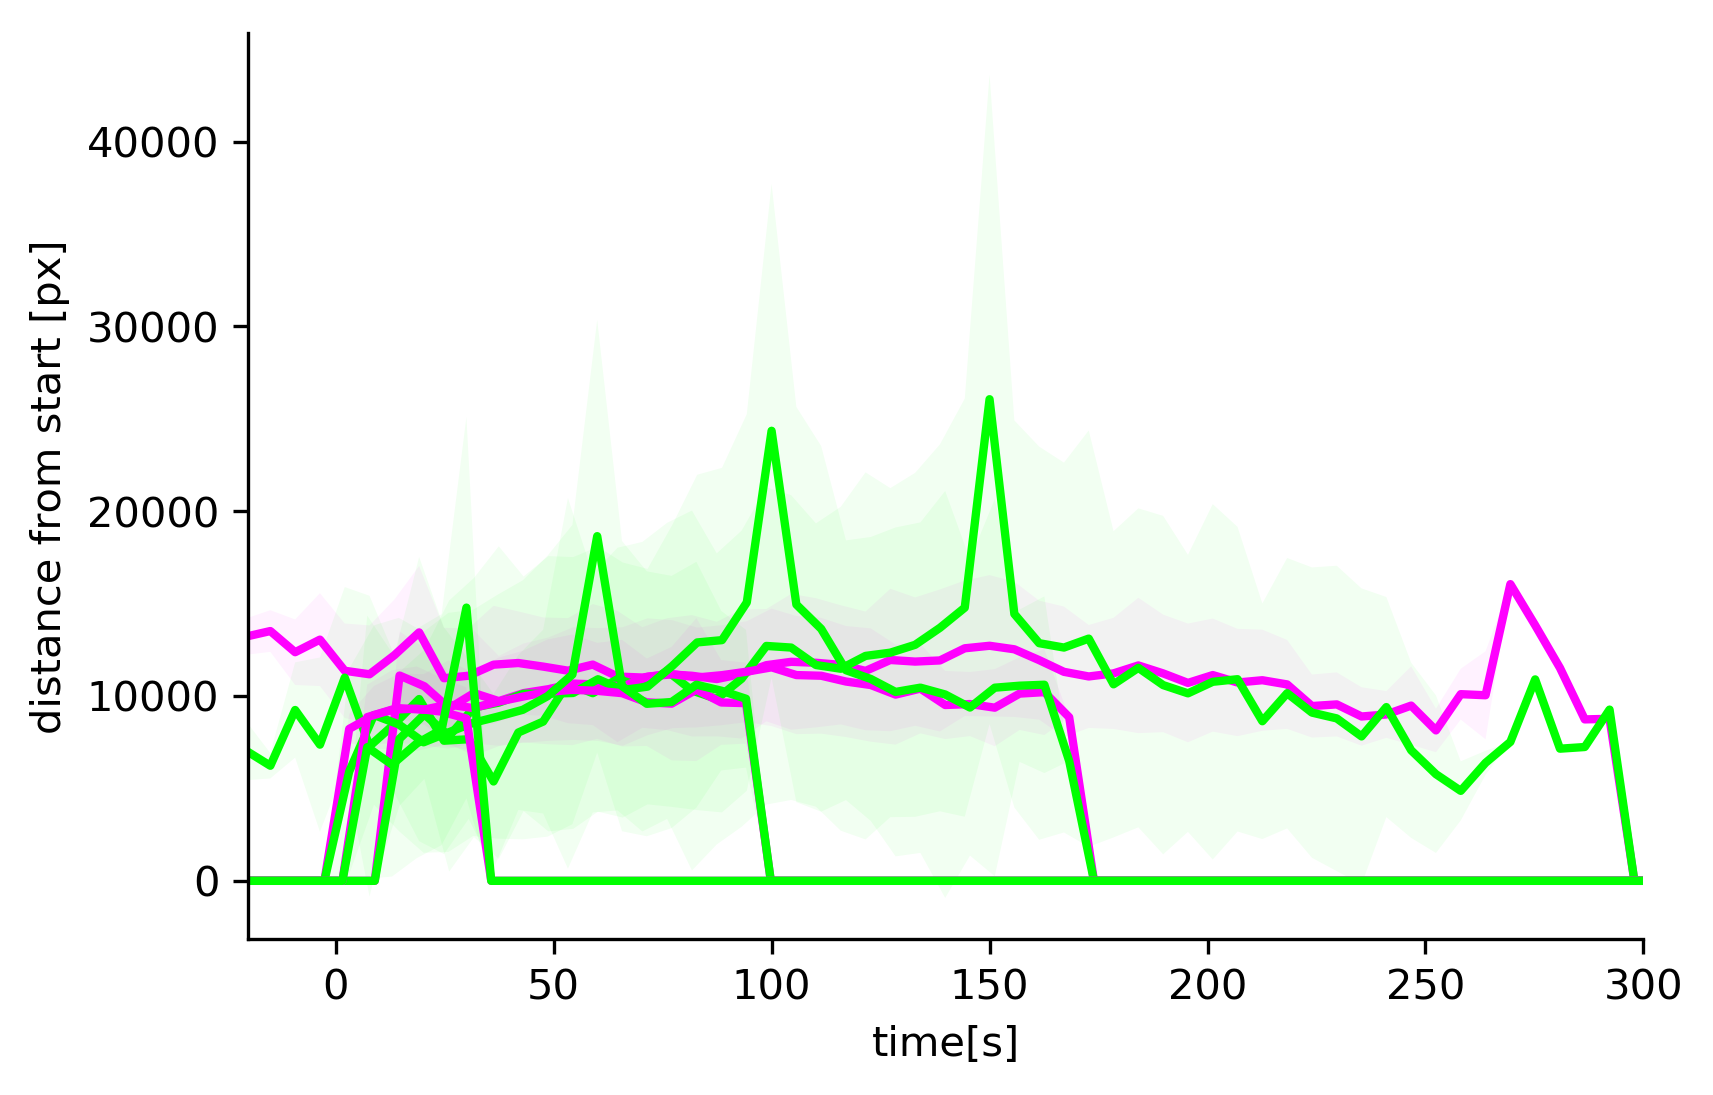

In [67]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100



timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,backgroundIntensity,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,backgroundIntensity,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,300)
#plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('distance from start [px]')

In [ ]:
# normalize before putting into cohorts

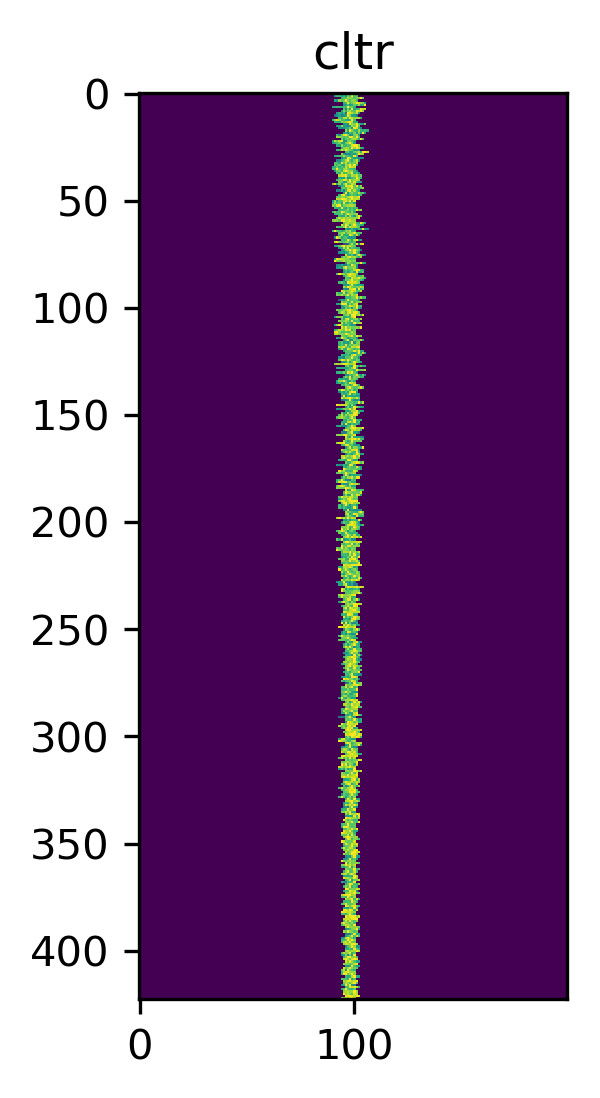

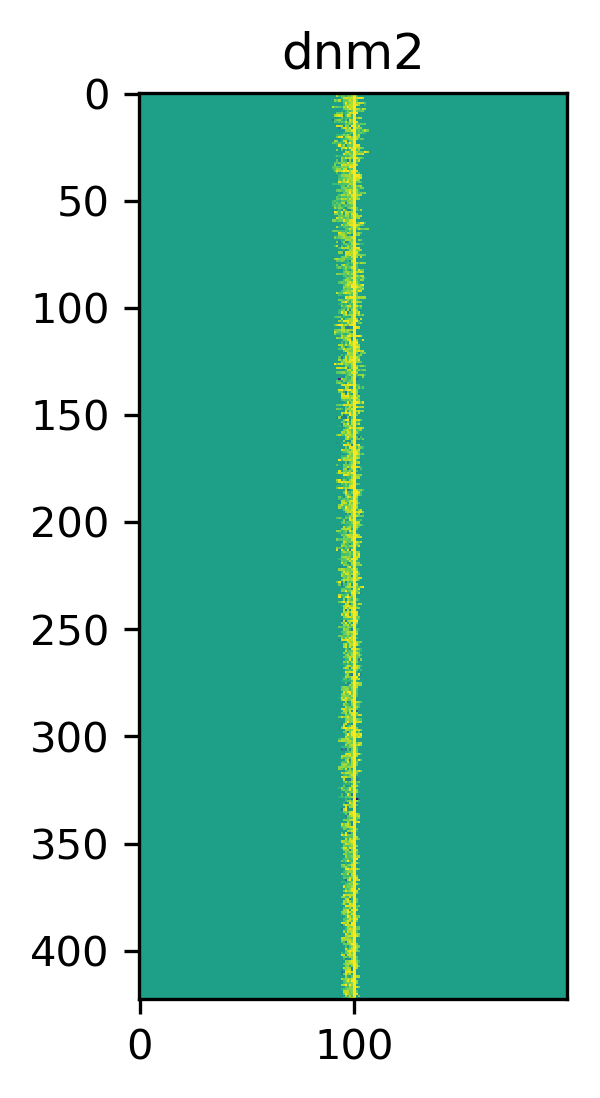

In [53]:
#calculate all the buffers for all cohorts
backgroundIntensity = 0

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForLifetimeCohort_normalized(trackIdsAssignedToCohorts[i],backgroundIntensity)
    cohortBuffers.append([m_buffer,s_buffer])

m_buffer,s_buffer = cohortBuffers[1]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

Text(0,0.5,'fluorescence intensity [AU]')

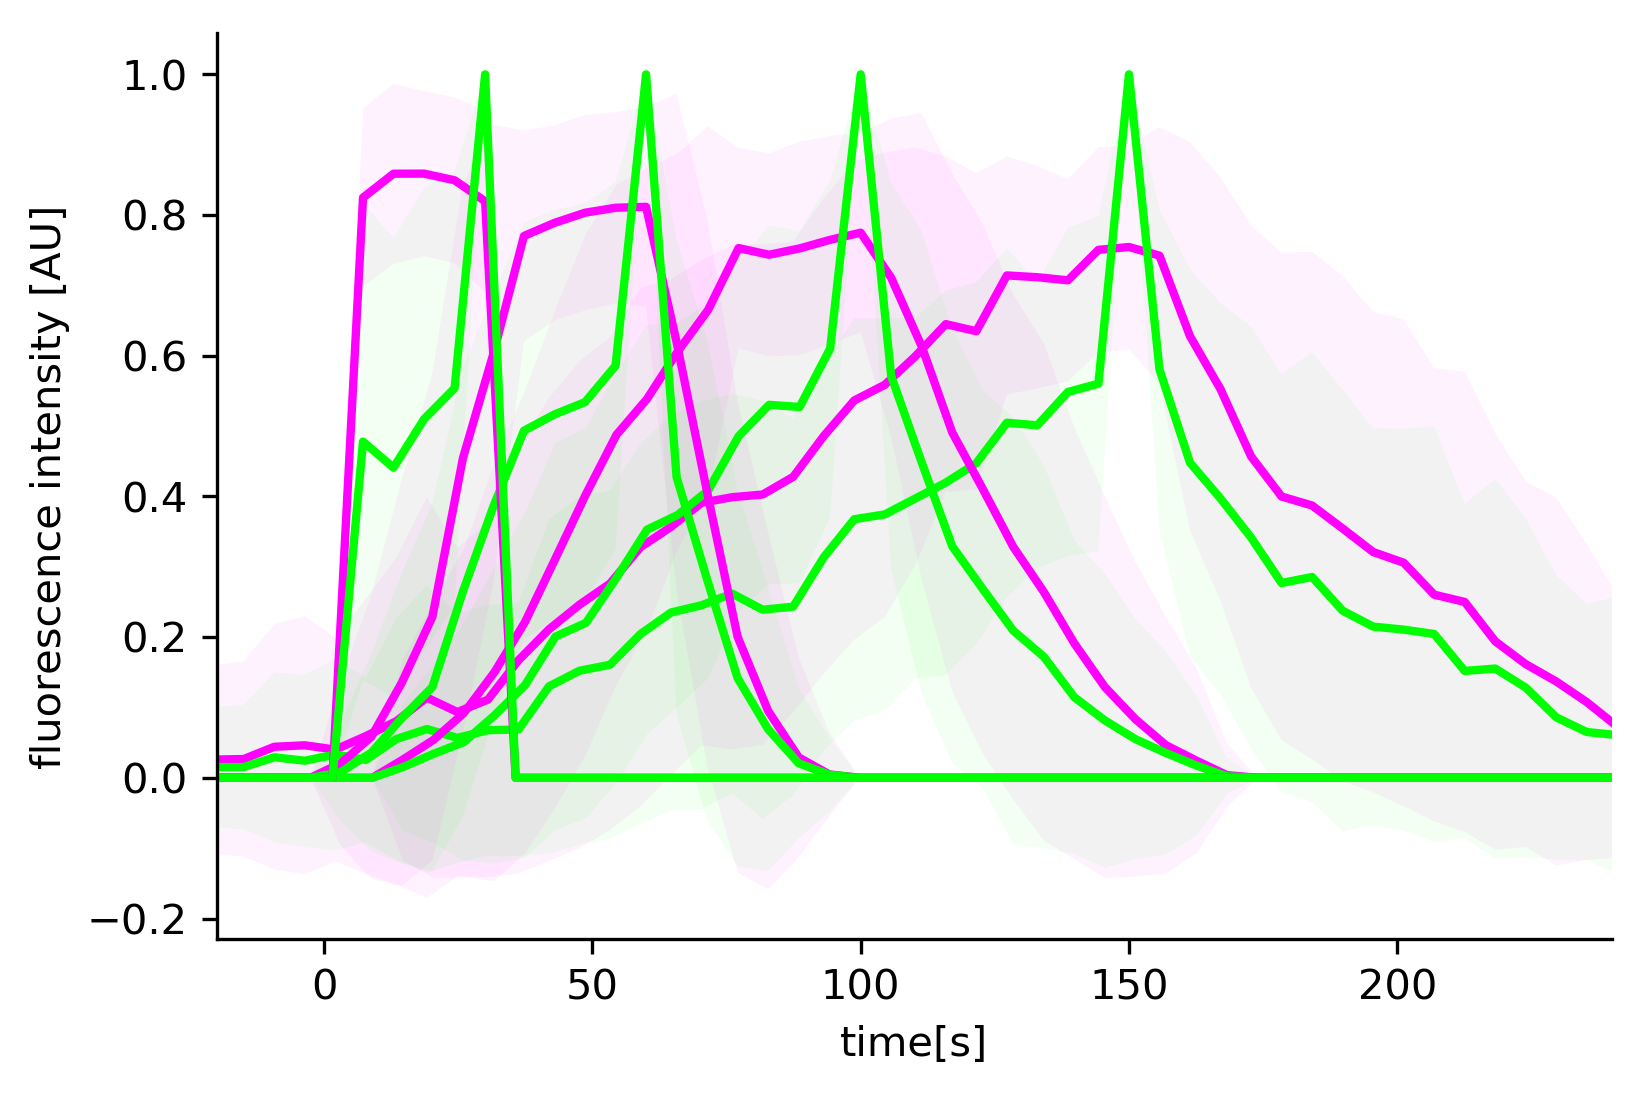

In [54]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['magenta','magenta','magenta','magenta']
s_colors = ['lime','lime','lime','lime']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,240)
#plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('fluorescence intensity [AU]')

(-120, 100)

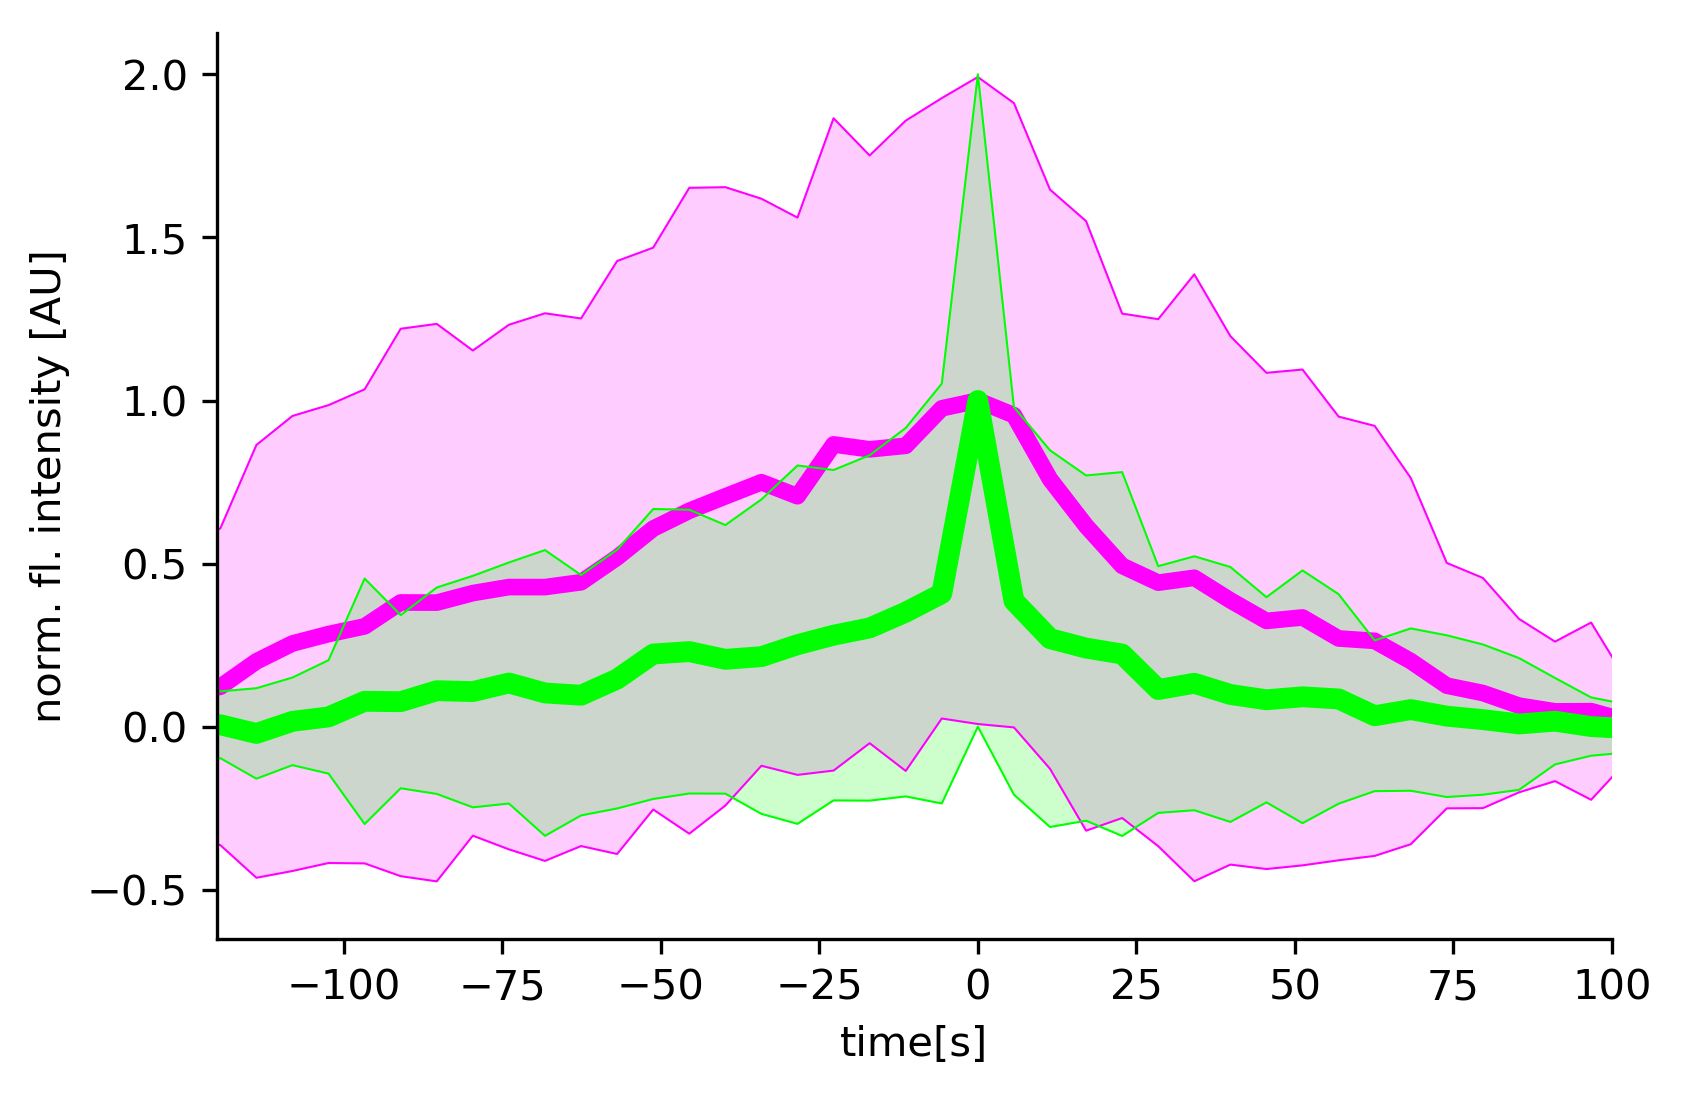

In [27]:
m_buffer_average = (np.nanmean(m_buffer,axis=0)-backgroundIntensity)
m_buffer_average = m_buffer_average/max(m_buffer_average)
s_buffer_average = (np.nanmean(s_buffer,axis=0)-backgroundIntensity)/max(s_buffer_average)
s_buffer_average = s_buffer_average/max(s_buffer_average)

m_buffer_std = np.nanstd(m_buffer,axis=0)
m_buffer_std = m_buffer_std/max(m_buffer_std)
s_buffer_std = np.nanstd(s_buffer,axis=0)
s_buffer_std = s_buffer_std/max(s_buffer_std)

time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)

plt.figure(dpi=300)

plt.plot(time,m_buffer_average,c='magenta',lw=4)
plt.plot(time,m_buffer_average-m_buffer_std,c='magenta',lw=0.5)
plt.plot(time,m_buffer_average+m_buffer_std,c='magenta',lw=0.5)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor='magenta',alpha=0.2)

plt.plot(time,s_buffer_average,c='lime',lw=5)
plt.plot(time,s_buffer_average-s_buffer_std,c='lime',lw=0.5)
plt.plot(time,s_buffer_average+s_buffer_std,c='lime',lw=0.5)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor='lime',alpha=0.2)

plt.xlabel('time[s]')
plt.ylabel('norm. fl. intensity [AU]')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.ylim(-0.5,2.1)
plt.xlim(-120,100)

(-220, 120)

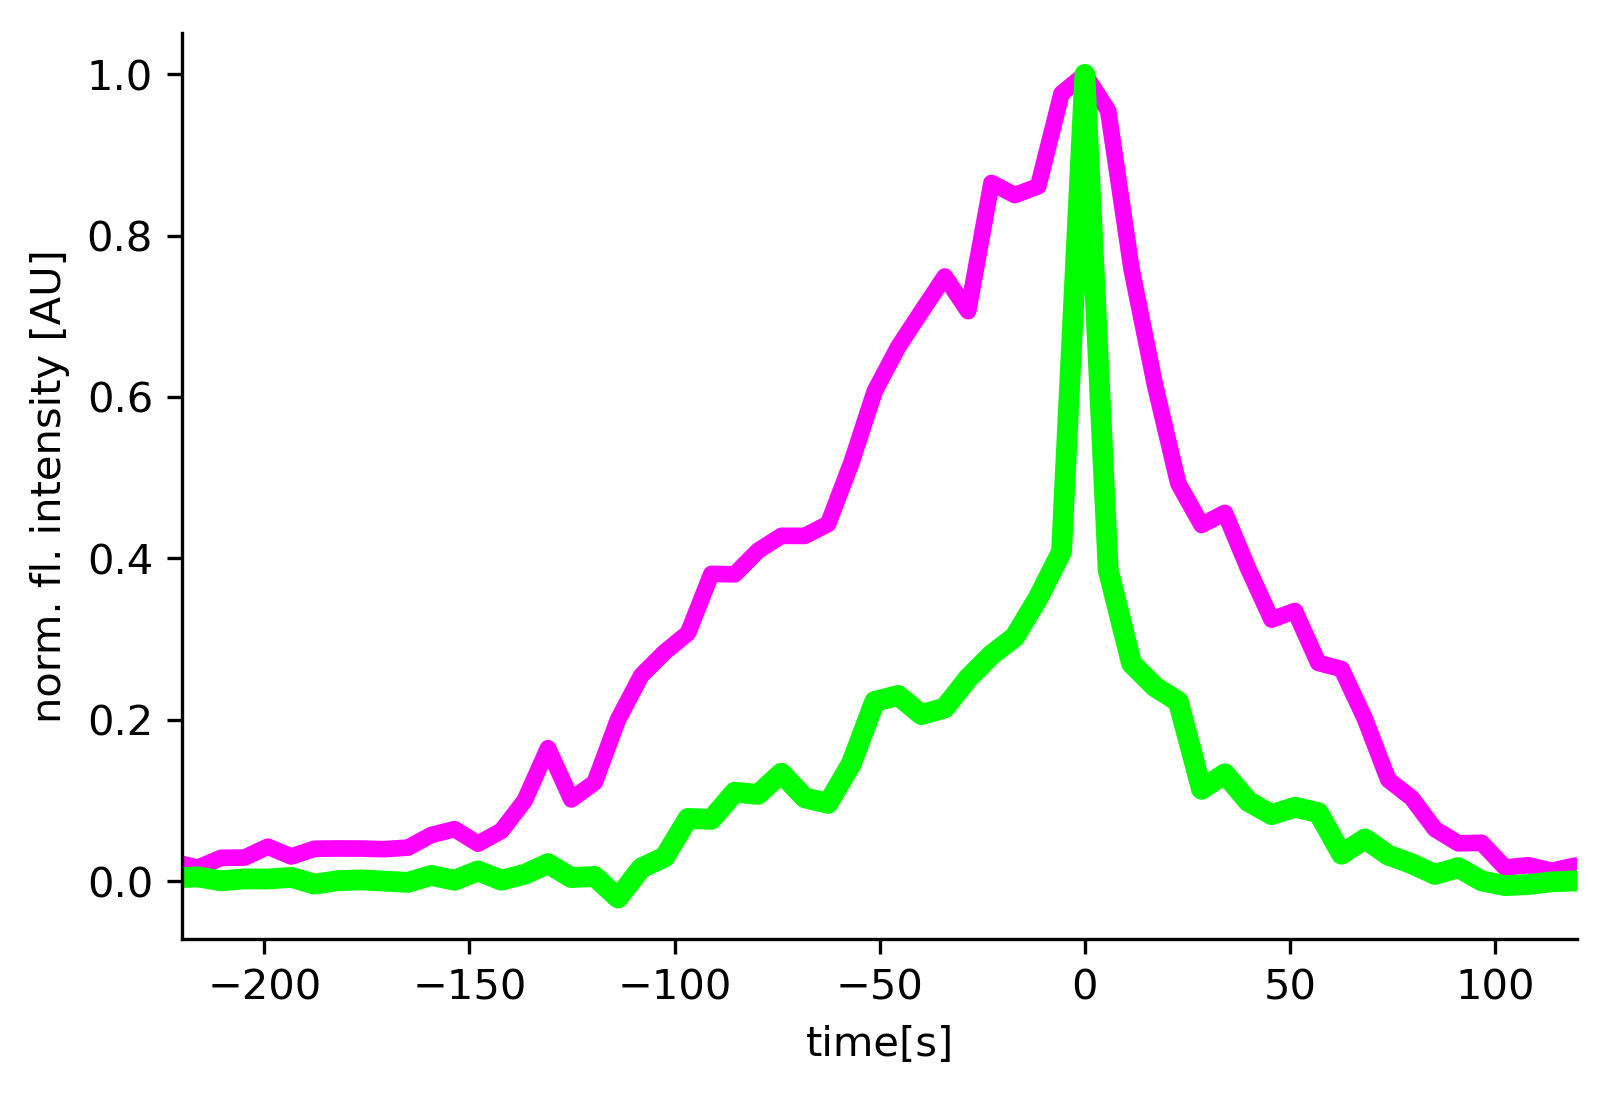

In [28]:

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)
plt.figure(dpi=300)
plt.plot(time,m_buffer_average/max(m_buffer_average),c='magenta',lw=4)
plt.plot(time,s_buffer_average/max(s_buffer_average),c='lime',lw=5)
plt.xlabel('time[s]')
plt.ylabel('norm. fl. intensity [AU]')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-220,120)


In [97]:
m_mean = []
s_mean = []
for i in range(0,bufferSize):
    m_mean.append(np.nanmean(m_buffer[i]))
    s_mean.append(np.nanmean(s_buffer[i]))
    
plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

IndexError: index 16 is out of bounds for axis 0 with size 16

In [ ]:
#Lifetime Cohorts

In [ ]:
for tc in range(1,len(lifetimeCohorts)):

    m_buffer = []
    s_buffer = []
    bufferSize = 1000
    for i in range(0,bufferSize):
        m_buffer.append([])
        s_buffer.append([])
    
        
    for trackId in lifetimeCohorts[tc]:
        #print(trackId)
        track = data[data['trackId'] == trackId]
    
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        #plt.plot(s_intensity)
        
        for i in range(0,len(track)):
            m_buffer[i].append(m_intensity[i])
            s_buffer[i].append(s_intensity[i])
            
    
    m_mean = []
    s_mean = []
    for i in range(0,bufferSize):
        m_mean.append(np.nanmean(m_buffer[i]))
        s_mean.append(np.nanmean(s_buffer[i]))
        
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

plt.xlabel('lifetime[s]')
plt.show()




In [ ]:
for tc in range(1,len(lifetimeCohorts)):

    m_buffer = []
    s_buffer = []
    bufferSize = 1000
    for i in range(0,bufferSize):
        m_buffer.append([])
        s_buffer.append([])
    
        
    for trackId in lifetimeCohorts[tc]:
        #print(trackId)
        track = data[data['trackId'] == trackId]
    
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        #plt.plot(s_intensity)
        
        for i in range(0,len(track)):
            m_buffer[i].append(m_intensity[i])
            s_buffer[i].append(s_intensity[i])
            
    
    m_mean = []
    s_mean = []
    for i in range(0,bufferSize):
        m_mean.append(np.nanmean(m_buffer[i]))
        s_mean.append(np.nanmean(s_buffer[i]))
        
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

plt.xlabel('lifetime[s]')
plt.show()



In [ ]:
lifetimeThresholds = [1, 20, 40, 60, 80, 100, 120, 200]

lifetimeCohorts = []

dataBasis = cat_Ia_Tracks
for i in range(2,len(lifetimeThresholds)):
    lifetimeCohort_trackIds = np.unique(dataBasis.loc[(dataBasis["lifetime"] >= lifetimeThresholds[i-1]) & (dataBasis["lifetime"] < lifetimeThresholds[i]), "trackId"])
    print('number of tracks in cohort '+str(lifetimeThresholds[i-1])+'-'+str(lifetimeThresholds[i-1])+': '+str(len(lifetimeCohort_trackIds)))
    lifetimeCohorts.append(lifetimeCohort_trackIds)
#print(lifetimeCohorts)